<a href="https://colab.research.google.com/github/JanneWald/CS3960/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Logistic Regression

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Implement Logistic Regression algorithm

# TODO: Implement the sigmoid function. Refer to the formula in the homework4.docx file
def sigmoid(z):
    # make sure to use the z variable in the formula
    formula = 1 / (1 + np.exp(-z))

    return formula

def logistic_regression(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    # we need to update the weights and bias using gradient descent. Complete the code below
    for _ in range(num_iterations):
        # TODO: combine the inputs and weights together, and then add bias. Assign this value to z
        z = np.dot(X, weights) + bias

        # TODO: need to output probabilities betwen 0 and 1 (HINT: use the sigmoid function)
        y_predicted = sigmoid(z)

        # Compute the gradients
        m = X.shape[0]

        # TODO: dw is the gradient of the loss function w.r.t. the weights
        dw = (1 / m) * np.dot(X.T, (y_predicted - y))

        # TODO: db is the gradient of the loss function w.r.t. the bias
        db = (1 / m) * np.sum(y_predicted - y)

        # TODO: update the weights and bias using the computed gradients (HINT: use the learning rate)
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [ ]:
# Train Logistic Regression model
# TODO: Find good values for learning_rate and num_iterations
# This pro
learning_rate = 0.7
num_iterations = 1000
weights, bias = logistic_regression(X_train_scaled, y_train, learning_rate, num_iterations)

# Predict class labels using trained model
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_predicted = sigmoid(z)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

In [ ]:
y_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

y_train_pred = predict(X_train_scaled, weights, bias)
print('Train precision', precision_score(y_train, y_train_pred))


Precision: 0.9859154929577465
Recall: 0.9859154929577465
F1 Score: 0.9859154929577465
Accuracy: 0.9824561403508771
Train precision 0.9895833333333334


# Part 2: Perceptron

Ensure that PyTorch is installed before this section, as we will utilize this powerful library. For installation, check this link - [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# TODO: Concatenate 1's to the X_train_scaled and X_test_scaled from above
# Hint: You'll probably want to use the numpy concatenate operation
ones_train = np.ones((X_train_scaled.shape[0], 1))
ones_test = np.ones((X_test_scaled.shape[0], 1))

X_train_wones = np.append(ones_train, X_train_scaled, axis=1)
X_test_wones = np.append(ones_test, X_test_scaled, axis=1)


In [ ]:
# TODO: Define the Perceptron class including an __init__ function and a forward function
class Perceptron():
    # TODO: initialze the weight vector w
    def __init__(self, input_size):
      self.weights = np.random.randn(input_size)

    # TODO: classify a single example x using sgn(𝐰^T x + b)
    # Hint: make sure the output labels are correct
    def forward(self, x):
      activation = np.dot(self.weights, x)
      if activation >= 0:
        return 1
      else:
        return 0 # Labels are 0, 1 so I had to change the forward function to match, even tho they shoul be 1, -1 methinks

    # Implement the perceptron learning algorithm from slides
    def update(self, x, y, learning_rate):
        y_hat = self.forward(x)
        if y != y_hat:
            self.weights += learning_rate * (y - y_hat) * x

In [ ]:
# Train the model
# TODO: Find good values for learning_rate and num_iterations
learning_rate = .02
num_iterations = 100
input_size = X_train_wones.shape[1] # Note this is the input size with the 1's trick
perceptron = Perceptron(input_size)
for _ in range(num_iterations):
  for x_i, y_i in zip(X_train_wones, y_train):
    perceptron.update(x_i, y_i, learning_rate)

In [ ]:
# Evaluate the model
# Should get around 95% accuracy
print(np.unique(y_train))
print(np.unique(y_test)) # Labels are 0, 1 so I had to change the forward function to match

correct_count = 0
for x_i, y_i in zip(X_test_wones, y_test):
  correct = perceptron.forward(x_i) == y_i
  if correct:
    correct_count += 1
accuracy = float(correct_count) / len(y_test)
print("Test accuracy: %f" % accuracy)

[0 1]
[0 1]
Test accuracy: 0.921053


# Part 3: Data Preperation

In [ ]:
# First, make sure the values of X_train, X_test, y_train, y_test are set correctly from Assignment 1 and not overwritten
# If necessary, go back and rerun the original cell to make sure you have those correct values
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
[[1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.789e-01 2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]
 [1.422e+01 2.785e+01 9.255e+01 ... 8.219e-02 1.890e-01 7.796e-02]
 [2.073e+01 3.112e+01 1.357e+02 ... 1.659e-01 2.868e-01 8.218e-02]]
[1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0

In [ ]:
# TODO: Rewrite the logistic regression code to include test evals at every n iterations
# Should now return test accuracy every n iterations
def logistic_regression_with_eval(X, y, X_test, y_test, learning_rate, num_iterations, eval_every=1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    train_acc_all = []
    test_acc_all = []

    # Fill in with old solution
    for i in range(num_iterations):
        # Add your code from above
        # TODO: combine the inputs and weights together, and then add bias. Assign this value to z
        z = np.dot(X, weights) + bias

        # TODO: need to output probabilities betwen 0 and 1 (HINT: use the sigmoid function)
        y_predicted = sigmoid(z)

        # Compute the gradients
        m = X.shape[0]

        # TODO: dw is the gradient of the loss function w.r.t. the weights
        dw = (1 / m) * np.dot(X.T, (y_predicted - y))

        # TODO: db is the gradient of the loss function w.r.t. the bias
        db = (1 / m) * np.sum(y_predicted - y)

        # TODO: update the weights and bias using the computed gradients (HINT: use the learning rate)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Add new code here
        if i % eval_every == 0:
            # Training accuracy
            y_pred_train = sigmoid(np.dot(X, weights) + bias)
            y_pred_train_labels = (y_pred_train >= 0.5).astype(int)
            train_acc = np.mean(y_pred_train_labels == y)

            # Test accuracy
            y_pred_test = sigmoid(np.dot(X_test, weights) + bias)
            y_pred_test_labels = (y_pred_test >= 0.5).astype(int)
            test_acc = np.mean(y_pred_test_labels == y_test)

            train_acc_all.append(train_acc)
            test_acc_all.append(test_acc)

    return weights, bias, train_acc_all, test_acc_all

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Take your solution from above and plot the train and test curves
# TODO: Copy hyperparamers from your solution above
learning_rate = .3
num_iterations = 500
eval_every = 5
weights_scaled, bias_scaled, train_acc_scaled, test_acc_scaled = logistic_regression_with_eval(X_train_scaled, y_train, X_test_scaled, y_test, learning_rate, num_iterations, eval_every=eval_every)

# Make sure you get the same values as before
y_pred = predict(X_test_scaled, weights, bias)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Precision: 0.18
Recall: 0.1267605633802817
F1 Score: 0.1487603305785124
Accuracy: 0.09649122807017543
Weights: [-0.53822198 -0.6443313  -0.51158742 -0.5913959  -0.18965031  0.30207492
 -0.72859443 -0.88231431  0.09152847  0.29760417 -1.06735142  0.09808244
 -0.69818784 -0.80689208 -0.22943674  0.73493547  0.04301682 -0.18771344
  0.37808669  0.61974564 -0.89035169 -1.16571859 -0.74127846 -0.86976345
 -0.75769992 -0.08388373 -0.85223909 -0.83591    -1.01814022 -0.14548557]


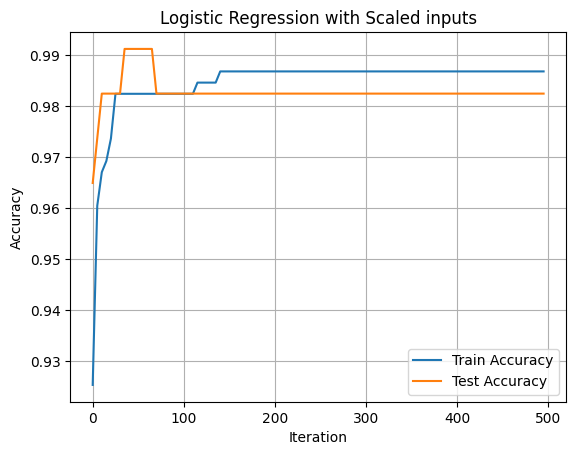

In [ ]:
# TODO:
# Using Matplotlib, make a plot with #iterations on the x axis and train and test accuracy on the y_axis
# Recall, we asked you to make simple plots in HW1
plt.title('Logistic Regression with Scaled inputs')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.plot(range(0, num_iterations, eval_every), train_acc_scaled, label='Train Accuracy')
plt.plot(range(0, num_iterations, eval_every), test_acc_scaled, label='Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-3085944827.py:6: RuntimeWarning: overflow encountered in exp
  formula = 1 / (1 + np.exp(-z))


Precision: 0.9850746268656716
Recall: 0.9295774647887324
F1 Score: 0.9565217391304348
Accuracy: 0.9473684210526315
Weights: [ 8.33322396e+00  1.36574264e+01  4.97782402e+01  3.09815192e+01
  8.33948504e-02  1.08461043e-03 -9.51853389e-02 -4.32810720e-02
  1.56376899e-01  6.42772407e-02  4.41897235e-02  1.02798146e+00
  4.05174209e-02 -1.97197203e+01  5.81696146e-03  3.59837310e-03
 -4.39532167e-04  2.05718198e-03  1.69113176e-02  2.54099221e-03
  8.56453549e+00  1.76109055e+01  5.02139813e+01 -3.78596399e+01
  1.07847313e-01 -4.12193381e-02 -1.68724364e-01 -3.63125877e-02
  2.20221476e-01  6.81098680e-02]


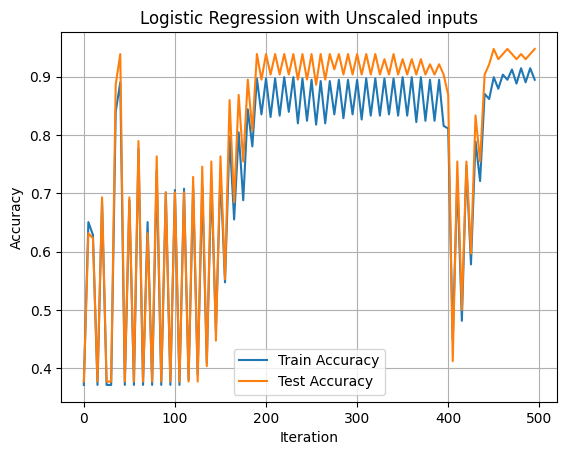

In [ ]:
# TODO - re-train and replot logistic regression without doing any input rescaling
# This should mostly be copying code from above but using the unscaled data
# TODO: Copy hyperparamers from your solution above
learning_rate = .03
num_iterations = 500
eval_every = 5
weights, bias, train_acc, test_acc = logistic_regression_with_eval(X_train, y_train, X_test, y_test, learning_rate, num_iterations, eval_every=eval_every)

# Make sure you get the same values as before
y_pred = predict(X_test, weights, bias)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

# TODO:
# Using Matplotlib, make a plot with #iterations on the x axis and train and test accuracy on the y_axis
# Recall, we asked you to make simple plots in HW1
plt.title('Logistic Regression with Unscaled inputs')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.plot(range(0, num_iterations, eval_every), train_acc, label='Train Accuracy')
plt.plot(range(0, num_iterations, eval_every), test_acc, label='Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

What do you notice about the training curves and accuracy?

From the training curves we can see a stark difference between scaled and unscaled data. The scaled data resembles a logarithmic curve, starting from an already high start point of .94 accuracy. This quickly converges and platues around .985 accuracy. The unscaled data is very turbulent. It starts off low at .37 accuracy and keeps switching from a high to low accuracy. It eventually converges at 200 iterations. Interestingly the accuracy tanks at 400 iterations but recovers somewhat quickly. So we can see that the model has a much easier time training and predicting with scaled data.


Examine the weights for both the scaled and unscaled logistic regression? What do you notice?

In [ ]:
# Compare weights
print("Weights:", weights)
print("Scaled Weights:", weights_scaled)

Weights: [ 8.33322396e+00  1.36574264e+01  4.97782402e+01  3.09815192e+01
  8.33948504e-02  1.08461043e-03 -9.51853389e-02 -4.32810720e-02
  1.56376899e-01  6.42772407e-02  4.41897235e-02  1.02798146e+00
  4.05174209e-02 -1.97197203e+01  5.81696146e-03  3.59837310e-03
 -4.39532167e-04  2.05718198e-03  1.69113176e-02  2.54099221e-03
  8.56453549e+00  1.76109055e+01  5.02139813e+01 -3.78596399e+01
  1.07847313e-01 -4.12193381e-02 -1.68724364e-01 -3.63125877e-02
  2.20221476e-01  6.81098680e-02]
Scaled Weights: [-0.53822198 -0.6443313  -0.51158742 -0.5913959  -0.18965031  0.30207492
 -0.72859443 -0.88231431  0.09152847  0.29760417 -1.06735142  0.09808244
 -0.69818784 -0.80689208 -0.22943674  0.73493547  0.04301682 -0.18771344
  0.37808669  0.61974564 -0.89035169 -1.16571859 -0.74127846 -0.86976345
 -0.75769992 -0.08388373 -0.85223909 -0.83591    -1.01814022 -0.14548557]


Obviously, the scaled data is much easier to read. The unscaled data can often be different by a magnitued 1000. Proportinally to eachother, the weights rather similar as well. An important note, I ran into a few mathematical overflows while using the unscaled weights.

# Converting to PDF

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/HW4.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/HW4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 473698 bytes to /content/drive/MyDrive/Colab Notebooks/HW4.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
